<a href="https://colab.research.google.com/github/mn000000/Simulacion-2/blob/main/Prueba_Ji_Cuadrada_Numeros_Aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba Chi-Cuadrada para Números Aleatorios


En esta notebook, implementaremos la Prueba de Bondad de Ajuste Chi-Cuadrada para evaluar si una secuencia de números aleatorios sigue una distribución uniforme. La Prueba Chi-Cuadrada es una prueba estadística utilizada para determinar si hay una diferencia significativa entre las frecuencias observadas y las esperadas en una o más categorías.


In [1]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


## Función para realizar la Prueba Chi-Cuadrada

In [2]:

def prueba_chi_cuadrado(observados, esperados):
    chi2_stat = ((observados - esperados) ** 2 / esperados).sum()
    df = len(observados) - 1
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    return chi2_stat, p_value


## Generación de Números Aleatorios y Prueba Chi-Cuadrada

In [3]:

# Generar una secuencia de números aleatorios uniformes
N = 100
numeros_aleatorios = np.random.uniform(0, 1, N)

# Definir los intervalos y contar las frecuencias observadas
intervalos = np.linspace(0, 1, 11)
observados, _ = np.histogram(numeros_aleatorios, bins=intervalos)

# Calcular las frecuencias esperadas para una distribución uniforme
esperados = np.full(len(observados), N / len(observados))

# Realizar la prueba Chi-Cuadrada
chi2_stat, p_value = prueba_chi_cuadrado(observados, esperados)

print(f"Estadística chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: los datos no siguen una distribución uniforme")
else:
    print("No podemos rechazar la hipótesis nula: los datos siguen una distribución uniforme")


Estadística chi-cuadrado: 17.400000000000002
Valor p: 0.04280828175766782
Rechazamos la hipótesis nula: los datos no siguen una distribución uniforme


## Visualización de los Datos Observados vs Esperados

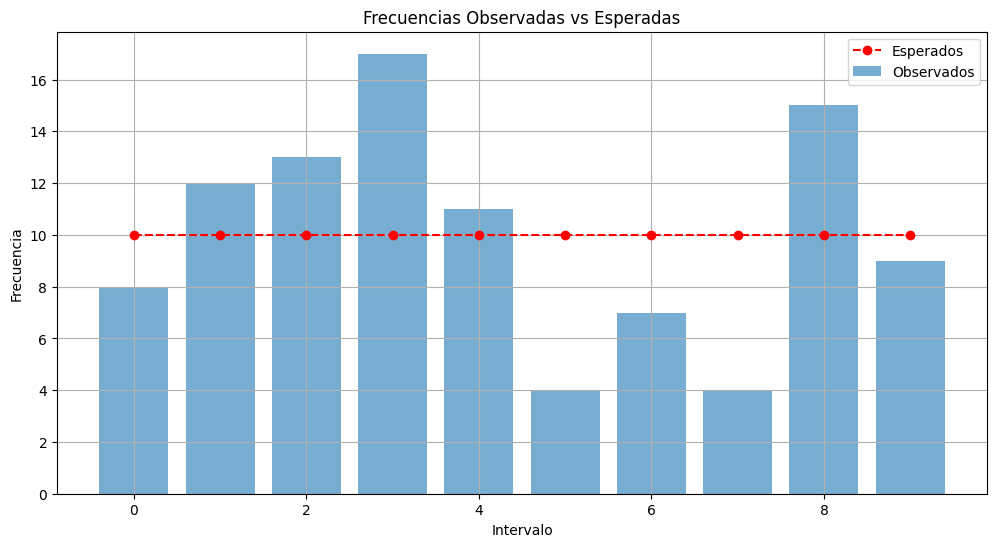

In [4]:

# Visualización de los datos observados vs esperados
plt.figure(figsize=(12, 6))
plt.bar(range(len(observados)), observados, alpha=0.6, label='Observados')
plt.plot(range(len(esperados)), esperados, 'ro--', label='Esperados')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencias Observadas vs Esperadas')
plt.legend()
plt.grid()
plt.show()
